In [1]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

Tahap NLP Pipeline: Data Acquisition

In [3]:
df = pd.read_csv(
    "hf://datasets/siRendy/dataset-analisis-sentimen-review-produk/dataset-sentimen-analisis-v3.csv"
)

df.head()

,text,sentiment
0,barang sesuai gambar dan diterima dalam kondis...,1
1,sesuai deskripsi. terima kasih,1
2,good barang enak,1
3,barang sesuai deskripsi dan seller sangat resp...,1
4,"barang sesuai, mantap",1


In [8]:
df.info()
df['sentiment'].value_counts()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10589 entries, 0 to 10588
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       10589 non-null  object
 1   sentiment  10589 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 165.6+ KB


,text,sentiment
6849,barang banyak goresan jadi saya pikir itu beka...,0
1168,terbaik markotop wasaitop,1
2599,goodtq.,1
7816,pengiriman lama dan tidak ada cara perakitan b...,0
2410,mantul keren,1


Tahap NLP Pipeline: Preprocessing

In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()

,text,clean_text
0,barang sesuai gambar dan diterima dalam kondis...,barang sesuai gambar dan diterima dalam kondis...
1,sesuai deskripsi. terima kasih,sesuai deskripsi terima kasih
2,good barang enak,good barang enak
3,barang sesuai deskripsi dan seller sangat resp...,barang sesuai deskripsi dan seller sangat resp...
4,"barang sesuai, mantap",barang sesuai mantap


In [11]:
X = df['clean_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Tahap NLP Pipeline: Feature Extraction

In [12]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Tahap NLP Pipeline: Modeling

In [16]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

Tahap NLP Pipeline: Evaluation

In [17]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.908876298394712

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       895
           1       0.93      0.91      0.92      1223

    accuracy                           0.91      2118
   macro avg       0.91      0.91      0.91      2118
weighted avg       0.91      0.91      0.91      2118



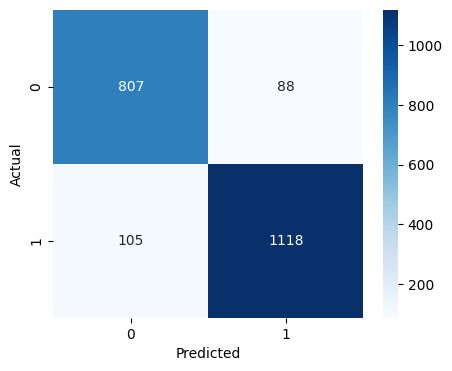

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

save model

In [19]:
import pickle

with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)